## GLM,  fixed versus random effects in fMRI

### Plan

1. Remind what is the issue with random and fixed effects
2. Construct some data set from one bold series
    1. Extract a time series   
    2. Add some signal (3 conditions)
3. Solve the GLM for one subject
4. Solve the GLM for 7 subjects
    1. Fixed
    2. Random
5. Testing. What is the distribution of our contrast of beta values ?

In [1]:
from __future__ import print_function, division
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# - set gray colormap and nearest neighbor interpolation by default
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.interpolation'] = 'nearest'

# - import numpy.linalg with a shorter name
import numpy.linalg as npl

In [25]:
np.set_printoptions(precision=3)

### 1. The issue with random and fixed effect

See http://www.fil.ion.ucl.ac.uk/spm/doc/books/hbf2/pdfs/Ch12.pdf

### 2. Construct some data from a BOLD time series

In [2]:
import nibabel as nib

In [3]:
# change this to the path of this image on your system
my_path_to_file = "/home/jb/code/pna2015/pna2015/day10/ds114_sub009_t2r1.nii"

(64, 64, 30, 173)


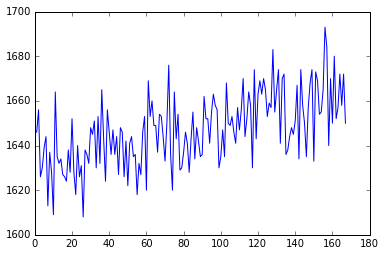

In [4]:
# load this image, get the 32,32,15 voxel time series without the 5 first points
to_rm = 5
img = nib.load(my_path_to_file)
print(img.shape)
(x,y,z) = (32,32,15)
plt.plot(img.get_data()[x,y,z,to_rm:])


In [5]:
# add some signal with a signal to noise ratio of 2, 
# divide the time in 12 intervals, which will be 4 periods of 3 conditions each (eg a,b,c),  
# make a signal for a, b and c (each will have zeros except for 4 intervals of ones)
print(x,y,z,to_rm)
bold = np.asarray(img.get_data()[x,y,z,to_rm:])
std = bold.std()


32 32 15 5


(42,)


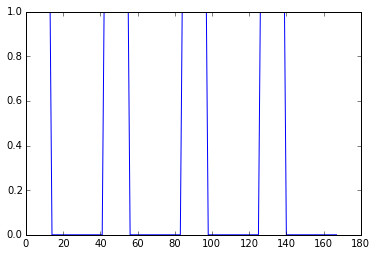

In [6]:
cond_duration = bold.shape[0] // 12

ones = np.ones((cond_duration,1))
#a = np.repeat([1,0,0],3).reshape(3,3).T.flatten().reshape(9,1)
a = np.kron(np.eye(3), ones)
print(a[:,0].shape)
signal_a = np.kron(np.ones(4), a[:,0]).flatten()
signal_b = np.kron(np.ones(4), a[:,1]).flatten()
signal_c = np.kron(np.ones(4), a[:,2]).flatten()
plt.plot(signal_a)

(168, 3)


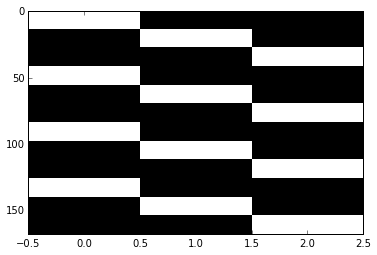

In [7]:
X = np.vstack((signal_a, signal_b, signal_c)).T
plt.imshow(X,aspect='auto',interpolation='nearest')
print(X.shape)

In [8]:
sig_mag = 2*std

In [9]:
c = [sig_mag, 0, 0]
Y = y + X.dot(c)

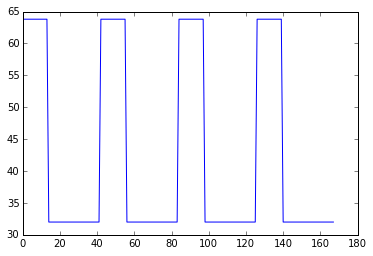

In [10]:
plt.plot(Y)

### Now, recall the GLM and how to test a contrast 

Looking again at our time series, we should add a trend...

In [34]:
# Add a trend to X
trend = np.arange(X.shape[0])[:,np.newaxis]/X.shape[0]
trend -= trend.mean()
X2 = np.hstack((X, trend))
c = np.asarray([1,0,0,0]).reshape(4,1)
print(X.shape)
beta = npl.pinv(X).dot(Y)

(168, 3)


In [35]:
beta2 = npl.pinv(X2).dot(Y)

In [36]:
print(beta, beta2)

[ 63.809  32.     32.   ] [  6.381e+01   3.200e+01   3.200e+01   1.221e-14]


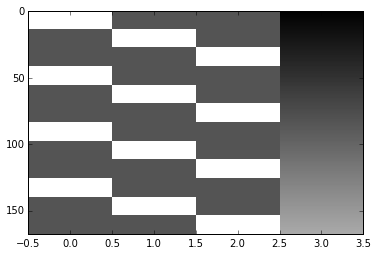

In [37]:
plt.imshow(X2,aspect='auto',interpolation='nearest')
